In [17]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
boston = load_boston()
b=pd.DataFrame(boston.data,columns=boston.feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
b.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
b.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

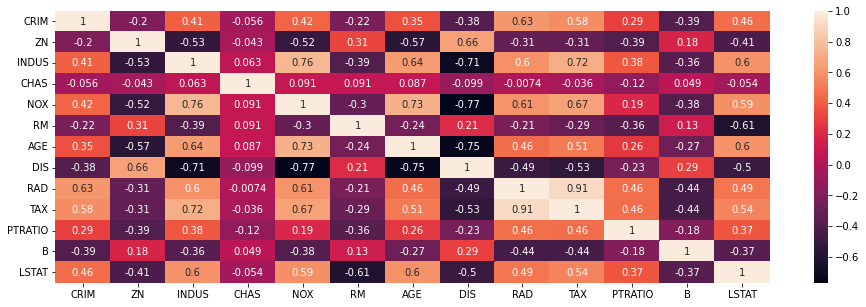

In [6]:
plt.figure(figsize = (16,5))

sns.heatmap(b.corr(), annot=True)

In [7]:
b.drop(columns=["RAD","TAX"])
b.LSTAT = np.log(b.LSTAT)

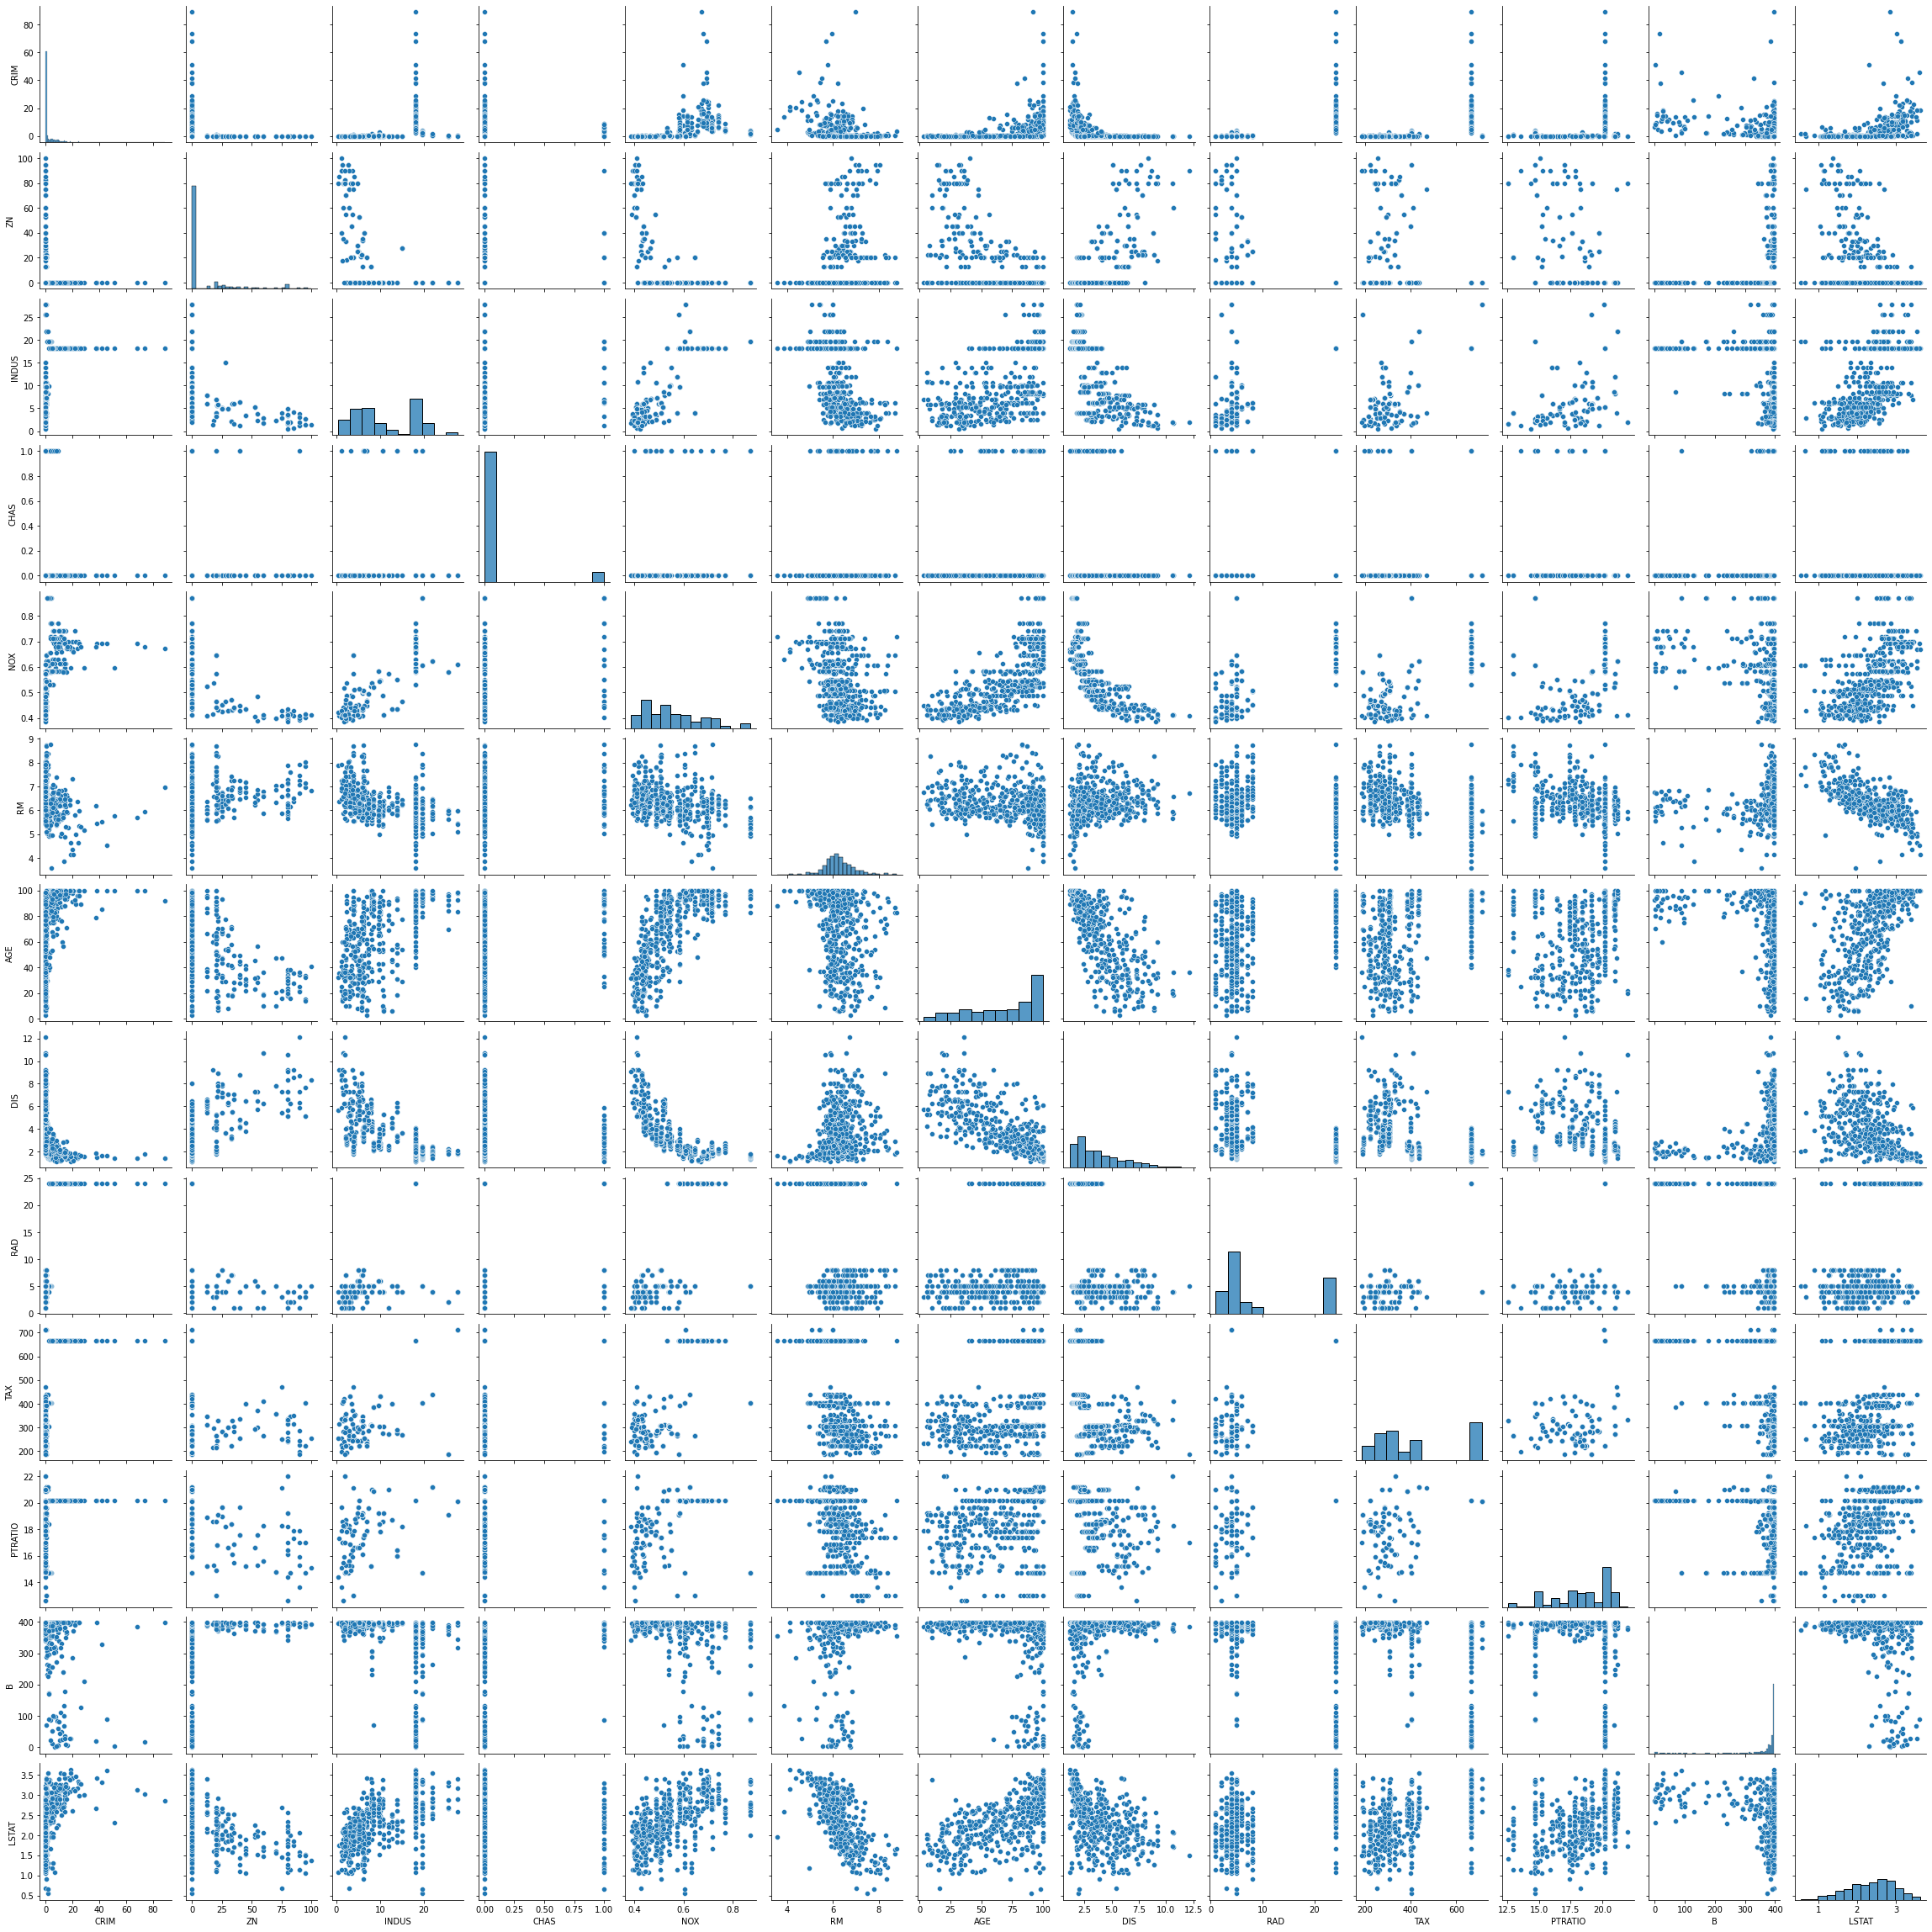

In [8]:
sns.pairplot(b)

In [9]:
target=b.columns[-1]
features=b.columns[0:11]


In [10]:
lr=LinearRegression()
X = b[features].values
y = b[target].values

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=31)


In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
pred = lr.predict(X_test)

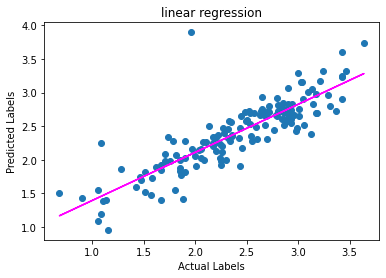

In [42]:
plt.scatter(y_test, pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title("linear regression")
# overlay the regression line
z = np.polyfit(y_test, pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

measures of accuracy for linear regression model.

In [36]:
mse = mean_squared_error(y_test, pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, pred)
print("R2:", r2)


MSE: 0.10193762251862146
RMSE: 0.31927671778352623
R2: 0.7344149141736163


i'll try to improve these using ridge and lasso regressions.

In [25]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [26]:
lpred=lasso.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, lpred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, lpred)
print("R2:", r2)

MSE: 0.10304890176796223
RMSE: 0.3210123078138317
R2: 0.7315196220575055


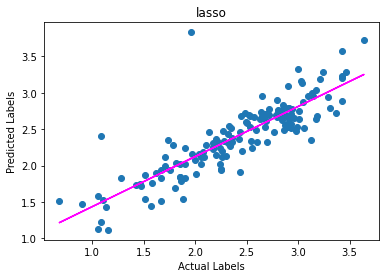

In [39]:
plt.scatter(y_test, lpred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title("lasso")
# overlay the regression line
z = np.polyfit(y_test, lpred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')

In [32]:
rr = Ridge(alpha=0.01) 
rr.fit(X_train,y_train)

Ridge(alpha=0.01)

In [33]:
rpred=rr.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, rpred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, rpred)
print("R2:", r2)

MSE: 0.10193351991979452
RMSE: 0.3192702928864421
R2: 0.7344256029559779


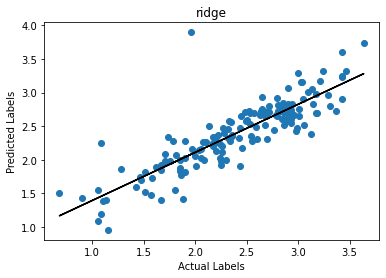

In [40]:
plt.scatter(y_test, rpred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title("ridge")
# overlay the regression line
z = np.polyfit(y_test, rpred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),label="linear", color='black')
plt.show()